# Face Recognition #

Assumptions : <br>
We have one or more chef images stored in a directory (e.g., data/chefs/chef_name.jpg)

These images are used to simulate DB-registered chefs for now

We’ll work on local files and use the face_recognition library

Once satisfied, we'll shift the logic into src/ files for Streamlit integration

## 1. Install and import libraries ##

In [66]:
#!pip install face_recognition

In [1]:
import sqlite3
import face_recognition
import os
import numpy as np
import ast

## 1.2 Connect to Database ##

In [2]:
db_path = '../data/chefs.db'  # Update if your DB is elsewhere
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

In [4]:
# Fetch id, name, image_path, and encoding
cursor.execute("SELECT id, name, image_path, encoding FROM registered_chefs")
rows = cursor.fetchall()

## 2. Load Chef Images ##

In [5]:
known_encodings = []
known_names = []
print(type(known_encodings), type(known_names))

<class 'list'> <class 'list'>


In [6]:
for row in rows:
    chef_id, name, image_path, encoding_str = row[0], row[1], row[2], row[3]
    
    try:
        # Convert stringified list to actual list and then to numpy array
        encoding_list = ast.literal_eval(encoding_str)
        encoding_np = np.array(encoding_list)
        
        known_encodings.append(encoding_np)
        known_names.append(name)
    except Exception as e:
        print(f"Failed to load encoding for {name}: {e}")

In [7]:
for i in range(len(known_encodings)):
    print(f"Length {i}: {known_encodings[i].shape}, Name: {known_names[i]}")

Length 0: (128,), Name: Harpal-Sokhi
Length 1: (128,), Name: Rohit-Sharma
Length 2: (128,), Name: Sanjeev-Kapoor
Length 3: (128,), Name: Vikas-Khanna
Length 4: (128,), Name: Ranveer-Brar
Length 5: (128,), Name: Madhur-Jaffrey
Length 6: (128,), Name: Anjum-Anand
Length 7: (128,), Name: Hari-Nayak
Length 8: (128,), Name: Tarla-Dalal
Length 9: (128,), Name: Nita-Mehta
Length 10: (128,), Name: Saransh-Goila


In [8]:
known_encodings = np.array(known_encodings)
print("Known Encodings Shape:", type(known_encodings))

Known Encodings Shape: <class 'numpy.ndarray'>


## 3. Load test image (newly captured or sample) ##

In [9]:
test_image_path = "../data/images/test/real.jpg"  # Use a sample image for now
test_image = face_recognition.load_image_file(test_image_path)
test_encodings = face_recognition.face_encodings(test_image)

if not test_encodings:
    print("❌ No face found in test image.")
else:
    print("✅ Face found in test image.")
    test_encoding = test_encodings[0]


✅ Face found in test image.


## 4. Compare and find match ##

In [10]:
if test_encodings:
    results = face_recognition.compare_faces(known_encodings, test_encoding, tolerance=0.4)
    distances = face_recognition.face_distance(known_encodings, test_encoding)

    print("Results:", results)
    print("Distances:", distances)

    if True in results:
        best_match_index = np.argmin(distances)
        name = known_names[best_match_index]
        print(f"🎉 Match found: {name}")
    else:
        print("❌ No match found.")


Results: [False, False, False, False, False, False, False, False, False, False, False]
Distances: [0.73511731 0.73405735 0.75783062 0.56219242 0.71984257 0.93159306
 0.86954834 0.76791799 0.90164696 0.87276331 0.77966159]
❌ No match found.


In [11]:
print(test_image)

[[[250 250 250]
  [250 250 250]
  [250 250 250]
  ...
  [251 251 251]
  [251 251 251]
  [251 251 251]]

 [[250 250 250]
  [250 250 250]
  [250 250 250]
  ...
  [251 251 251]
  [251 251 251]
  [251 251 251]]

 [[250 250 250]
  [250 250 250]
  [250 250 250]
  ...
  [251 251 251]
  [251 251 251]
  [251 251 251]]

 ...

 [[237 220 213]
  [237 220 213]
  [238 221 214]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]

 [[237 220 213]
  [236 219 212]
  [238 221 214]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]

 [[237 220 213]
  [236 219 212]
  [238 221 214]
  ...
  [250 250 250]
  [250 250 250]
  [250 250 250]]]


## 5. Visualize test image with result ##

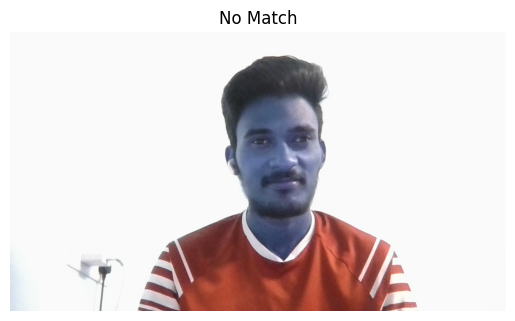

In [13]:
import matplotlib.pyplot as plt

# Convert BGR → RGB using numpy slicing
image_rgb = test_image[..., ::-1]   # reverses the last channel order

plt.imshow(image_rgb)
plt.title(f"Matched: {name}" if True in results else "No Match")
plt.axis('off')
plt.show()


In [15]:
conn.close()